In [3]:
#Part 2 A
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
data = pd.read_csv('matrix.txt', sep=",", header=None)
cosine = cosine_similarity(data)


In [5]:
#transpose data 

datax = data.T

In [7]:
datax

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
'''
Created on Feb 16, 2011
k Means Clustering for Ch10 of Machine Learning in Action
@author: Peter Harrington
'''
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

def kMeans(dataSet, k, distMeas=distEuclid, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))
    #create mat to assign data points 
    #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid\
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
                clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=distEuclid):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print ("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print ('the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [48]:
x=datax.iloc[:,1:120].values
y=datax.iloc[:,120:1211].values

In [49]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

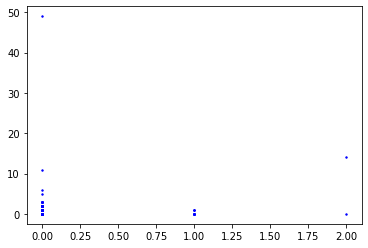

In [86]:
plt.scatter(x[ : ,20], x[ :, 80], s = 2, c = 'b')
plt.show()

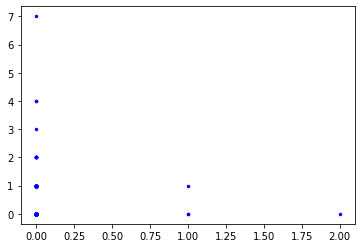

In [74]:
plt.scatter(y[ : , 8], y[ :, 10], s = 6, c = 'b')
plt.show()

In [31]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(x)

Kmean.cluster_centers_

array([[6.40256102e-03, 2.40096038e-03, 3.28131253e-02, 4.80192077e-03,
        1.20048019e-02, 4.00160064e-03, 2.24089636e-02, 1.60064026e-03,
        3.12124850e-02, 8.32332933e-02, 2.80112045e-03, 1.20048019e-03,
        2.00080032e-03, 3.20128051e-03, 1.60064026e-03, 2.40096038e-03,
        3.60144058e-03, 2.80112045e-03, 4.64185674e-02, 2.80112045e-03,
        4.80192077e-03, 5.60224090e-03, 4.00160064e-03, 1.60064026e-03,
        1.96078431e-02, 1.44057623e-02, 1.76070428e-02, 2.00080032e-03,
        1.20048019e-03, 6.00240096e-03, 1.60064026e-03, 1.04841937e-01,
        8.56342537e-02, 2.16086435e-02, 8.40336134e-03, 4.40176070e-03,
        5.20208083e-03, 3.20128051e-03, 2.00080032e-03, 4.00160064e-03,
        1.20048019e-03, 5.20208083e-03, 3.20128051e-03, 4.76190476e-02,
        3.20128051e-03, 1.08043217e-02, 1.12044818e-02, 1.04041617e-02,
        3.20128051e-03, 5.60224090e-03, 3.60144058e-03, 2.00080032e-03,
        1.24049620e-02, 8.40336134e-03, 2.00080032e-03, 1.200480

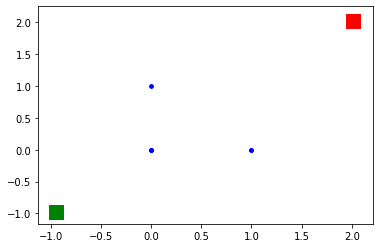

In [75]:
plt.scatter(x[ : , 0], x[ : , 10], s =10, c='b')

plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')

plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')

plt.show()

In [34]:
Kmean.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [76]:
from sklearn import metrics

In [84]:
x1=datax[1]
y1=datax[2]

metrics.homogeneity_score(x1, y1)

0.0012586419937276362

In [87]:
metrics.completeness_score(x1,y1)

0.00035905934995066193

In [90]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(datax, datax))
#> [[ 1.          0.48927489  0.37139068]
#>  [ 0.48927489  1.          0.38829014]
#>  [ 0.37139068  0.38829014  1.        ]]

[[1.         0.02966084 0.03192364 ... 0.06300971 0.01674828 0.0222431 ]
 [0.02966084 1.         0.05336972 ... 0.02414023 0.02566635 0.04090444]
 [0.03192364 0.05336972 1.         ... 0.01771491 0.03766966 0.0380216 ]
 ...
 [0.06300971 0.02414023 0.01771491 ... 1.         0.02044652 0.05974027]
 [0.01674828 0.02566635 0.03766966 ... 0.02044652 1.         0.03464564]
 [0.0222431  0.04090444 0.0380216  ... 0.05974027 0.03464564 1.        ]]
